# Homework Assignment 1

# Number 1: Find top 10 most common nouns of all speeches within the file.

In [160]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from PIL import Image # to import an image: pillow as PIL
import requests
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [161]:
df = pd.read_csv(r'UNGA_speeches.csv', encoding='cp1252')
df

,COUNTRY,STATEMENT
0,United Kingdom,"Mr President, your excellencies, ladies and ge..."
1,EU,In Senegal last December I met passionate doct...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin..."
3,Ukraine,Greetings to all people of the world who value...
4,France,"President of the General Assembly,\nUnder-Secr..."
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he..."
6,US,"Mr. President, Mr. Secretary-General, my fello..."


In [162]:
df = df.rename(columns=str.lower)

In [163]:
df

,country,statement
0,United Kingdom,"Mr President, your excellencies, ladies and ge..."
1,EU,In Senegal last December I met passionate doct...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin..."
3,Ukraine,Greetings to all people of the world who value...
4,France,"President of the General Assembly,\nUnder-Secr..."
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he..."
6,US,"Mr. President, Mr. Secretary-General, my fello..."


In [164]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [165]:
speeches = " ".join(statement for statement in df.statement)
speeches

'Mr President, your excellencies, ladies and gentlemen,\n\nAt the time of its foundation, the United Nations was a beacon of promise.\n\nIn the aftermath of the Second World War, this building symbolised the end of aggression.\n\nFor many decades the UN has helped to deliver stability and security in much of the world.\n\nIt has provided a place for nations to work together on shared challenges.\n\nAnd it has promoted the principles of sovereignty and self-determination even through the Cold War and its aftermath.\n\nBut today those principles, that have defined our lives since the dark days of the 1940s, are fracturing.\n\nFor the first time in the history of this assembly we are meeting during a large-scale war of aggression in Europe.\n\nAnd authoritarian states are undermining stability and security around the world.\n\nGeopolitics is entering a new era ? one that requires those who believe in the founding principles of the United Nations to stand up and be counted.\n\nIn the Unite

In [166]:
speeches_clean=[x.replace('\n','') for x in text]

In [167]:
tokens = nltk.word_tokenize(speeches)
tokens[:10]

['Mr',
 'President',
 ',',
 'your',
 'excellencies',
 ',',
 'ladies',
 'and',
 'gentlemen',
 ',']

In [168]:
len(tokens)

19157

In [169]:
new_tokens=[word for word in tokens if word.isalnum()]
len(new_tokens)

16776

In [170]:
new_tokens

['Mr',
 'President',
 'your',
 'excellencies',
 'ladies',
 'and',
 'gentlemen',
 'At',
 'the',
 'time',
 'of',
 'its',
 'foundation',
 'the',
 'United',
 'Nations',
 'was',
 'a',
 'beacon',
 'of',
 'promise',
 'In',
 'the',
 'aftermath',
 'of',
 'the',
 'Second',
 'World',
 'War',
 'this',
 'building',
 'symbolised',
 'the',
 'end',
 'of',
 'aggression',
 'For',
 'many',
 'decades',
 'the',
 'UN',
 'has',
 'helped',
 'to',
 'deliver',
 'stability',
 'and',
 'security',
 'in',
 'much',
 'of',
 'the',
 'world',
 'It',
 'has',
 'provided',
 'a',
 'place',
 'for',
 'nations',
 'to',
 'work',
 'together',
 'on',
 'shared',
 'challenges',
 'And',
 'it',
 'has',
 'promoted',
 'the',
 'principles',
 'of',
 'sovereignty',
 'and',
 'even',
 'through',
 'the',
 'Cold',
 'War',
 'and',
 'its',
 'aftermath',
 'But',
 'today',
 'those',
 'principles',
 'that',
 'have',
 'defined',
 'our',
 'lives',
 'since',
 'the',
 'dark',
 'days',
 'of',
 'the',
 '1940s',
 'are',
 'fracturing',
 'For',
 'the',
 '

In [171]:
speeches_clean = [word for word in new_tokens if word not in stopwords]

In [172]:
len(speeches_clean)

9406

In [173]:
pos_tokens=nltk.pos_tag(text_clean)
pos_tokens[:50]

[('Mr', 'NNP'),
 ('President', 'NNP'),
 ('excellencies', 'VBZ'),
 ('ladies', 'NNS'),
 ('gentlemen', 'NNS'),
 ('At', 'IN'),
 ('time', 'NN'),
 ('foundation', 'NN'),
 ('United', 'NNP'),
 ('Nations', 'NNP'),
 ('beacon', 'NN'),
 ('promise', 'NN'),
 ('In', 'IN'),
 ('aftermath', 'JJ'),
 ('Second', 'NNP'),
 ('World', 'NNP'),
 ('War', 'NNP'),
 ('building', 'NN'),
 ('symbolised', 'VBD'),
 ('end', 'NN'),
 ('aggression', 'NN'),
 ('For', 'IN'),
 ('many', 'JJ'),
 ('decades', 'NNS'),
 ('UN', 'NNP'),
 ('helped', 'VBD'),
 ('deliver', 'VB'),
 ('stability', 'JJ'),
 ('security', 'NN'),
 ('much', 'JJ'),
 ('world', 'NN'),
 ('It', 'PRP'),
 ('provided', 'VBD'),
 ('place', 'NN'),
 ('nations', 'NNS'),
 ('work', 'VBP'),
 ('together', 'RB'),
 ('shared', 'VBN'),
 ('challenges', 'NNS'),
 ('And', 'CC'),
 ('promoted', 'JJ'),
 ('principles', 'NNS'),
 ('sovereignty', 'RB'),
 ('even', 'RB'),
 ('Cold', 'NNP'),
 ('War', 'NNP'),
 ('aftermath', 'NN'),
 ('But', 'CC'),
 ('today', 'NN'),
 ('principles', 'NNS')]

In [174]:
nouns=[]
for word, pos in pos_tokens:
    if pos.startswith("N"):
        nouns.append(word)
        
nouns[:30]

['Mr',
 'President',
 'ladies',
 'gentlemen',
 'time',
 'foundation',
 'United',
 'Nations',
 'beacon',
 'promise',
 'Second',
 'World',
 'War',
 'building',
 'end',
 'aggression',
 'decades',
 'UN',
 'security',
 'world',
 'place',
 'nations',
 'challenges',
 'principles',
 'Cold',
 'War',
 'aftermath',
 'today',
 'principles',
 'lives']

In [175]:
verb=[]
for word, pos in pos_tokens:
    if pos.startswith("V"):
        verb.append(word)
        
verb[:30]

['excellencies',
 'symbolised',
 'helped',
 'deliver',
 'provided',
 'work',
 'shared',
 'defined',
 'fracturing',
 'meeting',
 'undermining',
 'entering',
 'requires',
 'believe',
 'founding',
 'stand',
 'counted',
 'entering',
 'join',
 'laid',
 'deeply',
 'passing',
 'rock',
 'symbolised',
 'founded',
 'underpinned',
 'delivered',
 'transcended',
 'healed',
 'saw']

In [176]:
adj=[]
for word, pos in pos_tokens:
    if pos.startswith("J"):
        adj.append(word)
        
adj[:30]

['aftermath',
 'many',
 'stability',
 'much',
 'promoted',
 'dark',
 'first',
 'authoritarian',
 'new',
 'new',
 'Late',
 'mourn',
 'modern',
 'constitutional',
 'democratic',
 'vital',
 'strong',
 'political',
 'new',
 'new',
 'era',
 'individual',
 'Late',
 'new',
 'new',
 'new',
 'strong',
 'enterprise',
 'unable',
 'adapt']

In [177]:
wnl = WordNetLemmatizer()

In [178]:
noun_lem=[]
for i in nouns:
    noun_lem.append(wnl.lemmatize(i, pos='n'))
    
print(noun_lem)

['Mr', 'President', 'lady', 'gentleman', 'time', 'foundation', 'United', 'Nations', 'beacon', 'promise', 'Second', 'World', 'War', 'building', 'end', 'aggression', 'decade', 'UN', 'security', 'world', 'place', 'nation', 'challenge', 'principle', 'Cold', 'War', 'aftermath', 'today', 'principle', 'life', 'day', 'time', 'history', 'war', 'aggression', 'Europe', 'state', 'stability', 'security', 'world', 'Geopolitics', 'era', 'principle', 'United', 'Nations', 'United', 'Kingdom', 'era', 'day', 'Majesty', 'Queen', 'Elizabeth', 'II', 'rest', 'pay', 'tribute', 'service', 'Britain', 'built', 'value', 'organisation', 'monarchy', 'society', 'stability', 'progress', 'Her', 'Late', 'Majesty', 'difference', 'division', 'visit', 'South', 'Africa', 'Republic', 'Ireland', 'General', 'Assembly', 'year', 'ideal', 'deliver', 'defend', 'ideal', 'people', 'farewell', 'Queen', 'UK', 'chapter', 'Carolean', 'age', 'Majesty', 'King', 'Charles', 'III', 'hope', 'defend', 'liberty', 'equality', 'freedom', 'democr

In [179]:
verb_lem=[]
for i in verb:
    verb_lem.append(wnl.lemmatize(i, pos='v'))
    
print(verb_lem)

['excellencies', 'symbolise', 'help', 'deliver', 'provide', 'work', 'share', 'define', 'fracture', 'meet', 'undermine', 'enter', 'require', 'believe', 'found', 'stand', 'count', 'enter', 'join', 'lay', 'deeply', 'pass', 'rock', 'symbolise', 'found', 'underpin', 'deliver', 'transcend', 'heal', 'saw', 'address', 'warn', 'show', 'fight', 'deliver', 'say', 'open', 'want', 'value', 'ensure', 'make', 'set', 'take', 'propose', 'need', 'adopt', 'begin', 'serve', 'come', 'give', 'choose', 'reflect', 'unleash', 'protect', 'sow', 'demise', 'suppress', 'rigid', 'erode', 'stifle', 'act', 'want', 'want', 'assume', 'go', 'autocracies', 'deliver', 'expect', 'need', 'keep', 'improve', 'renew', 'demonstrate', 'determine', 'expect', 'lead', 'begin', 'build', 'enterprise', 'attract', 'get', 'grow', 'need', 'deliver', 'expect', 'want', 'keep', 'live', 'mean', 'secure', 'cut', 'strengthen', 'ensure', 'coerce', 'rogue', 'transition', 'base', 'ensure', 'use', 'include', 'safeguard', 'chain', 'drive', 'protect

In [180]:
adj_lem=[]
for i in adj:
    adj_lem.append(wnl.lemmatize(i, pos='a')) 
    
print(adj_lem)

['aftermath', 'many', 'stability', 'much', 'promoted', 'dark', 'first', 'authoritarian', 'new', 'new', 'Late', 'mourn', 'modern', 'constitutional', 'democratic', 'vital', 'strong', 'political', 'new', 'new', 'era', 'individual', 'Late', 'new', 'new', 'new', 'strong', 'enterprise', 'unable', 'adapt', 'long', 'vital', 'judge', 'human', 'fundamental', 'live', 'democratic', 'real', 'different', 'democratic', 'new', 'progress', 'new', 'new', 'British', 'aim', 'average', 'high', 'public', 'contribute', 'affordable', 'reliable', 'toxic', 'authoritarian', 'harmed', 'reckless', 'future', 'renewable', 'nuclear', 'reliable', 'net', 'critical', 'dependent', 'seek', 'global', 'want', 'free', 'economic', 'authoritarian', 'new', 'strategic', 'new', 'deep', 'fellow', 'new', 'free', 'fair', 'many', 'control', 'critical', 'strategic', 'mutual', 'extend', 'left', 'vulnerable', 'global', 'impact', 'persistent', 'good', 'malign', 'resolute', 'international', 'decisive', 'collective', 'use', 'new', 'unprece

In [181]:
freq_nouns=nltk.FreqDist(noun_lem)
freq_nouns.most_common(10)

[('world', 96),
 ('war', 80),
 ('country', 73),
 ('peace', 68),
 ('United', 61),
 ('Russia', 59),
 ('security', 53),
 ('people', 47),
 ('nation', 44),
 ('Ukraine', 44)]

In [182]:
freq_verb=nltk.FreqDist(verb_lem)
freq_verb.most_common(10)

[('want', 32),
 ('take', 30),
 ('work', 29),
 ('make', 26),
 ('need', 26),
 ('stand', 22),
 ('build', 19),
 ('continue', 19),
 ('believe', 16),
 ('say', 15)]

In [183]:
freq_adj=nltk.FreqDist(adj_lem)
freq_adj.most_common(10)

[('new', 50),
 ('global', 46),
 ('international', 31),
 ('nuclear', 20),
 ('Ukrainian', 19),
 ('many', 18),
 ('strong', 17),
 ('Russian', 17),
 ('human', 14),
 ('economic', 14)]

# Number 2
# Make a Word Cloud for four country of your choice based on frequency

In [184]:
UK = df['statement'].values[0]
US = df['statement'].values[6]
SK = df['statement'].values[2]
ID = df['statement'].values[5]

In [185]:
UK = UK.lower()
US = US.lower()
SK = SK.lower()
ID = ID.lower()

In [186]:
UK_tokens = nltk.word_tokenize(UK)
US_tokens = nltk.word_tokenize(US)
SK_tokens = nltk.word_tokenize(SK)
ID_tokens = nltk.word_tokenize(ID)

In [187]:
UK_newtokens=[word for word in UK_tokens if word.isalnum()]
US_newtokens=[word for word in US_tokens if word.isalnum()]
SK_newtokens=[word for word in SK_tokens if word.isalnum()]
ID_newtokens=[word for word in ID_tokens if word.isalnum()]

In [188]:
UK_clean = [word for word in UK_newtokens if word not in stopwords]
US_clean = [word for word in US_newtokens if word not in stopwords]
SK_clean = [word for word in SK_newtokens if word not in stopwords]
ID_clean = [word for word in ID_newtokens if word not in stopwords]

In [189]:
UK_clean

['mr',
 'president',
 'excellencies',
 'ladies',
 'gentlemen',
 'time',
 'foundation',
 'united',
 'nations',
 'beacon',
 'promise',
 'aftermath',
 'second',
 'world',
 'war',
 'building',
 'symbolised',
 'end',
 'aggression',
 'many',
 'decades',
 'un',
 'helped',
 'deliver',
 'stability',
 'security',
 'much',
 'world',
 'provided',
 'place',
 'nations',
 'work',
 'together',
 'shared',
 'challenges',
 'promoted',
 'principles',
 'sovereignty',
 'even',
 'cold',
 'war',
 'aftermath',
 'today',
 'principles',
 'defined',
 'lives',
 'since',
 'dark',
 'days',
 '1940s',
 'fracturing',
 'first',
 'time',
 'history',
 'assembly',
 'meeting',
 'war',
 'aggression',
 'europe',
 'authoritarian',
 'states',
 'undermining',
 'stability',
 'security',
 'around',
 'world',
 'geopolitics',
 'entering',
 'new',
 'era',
 'one',
 'requires',
 'believe',
 'founding',
 'principles',
 'united',
 'nations',
 'stand',
 'counted',
 'united',
 'kingdom',
 'entering',
 'new',
 'era',
 'join',
 'two',
 'days

In [190]:
UK_word=[]
for word in UK_clean:
        UK_word.append(word)
        
UK_word[:30]

['mr',
 'president',
 'excellencies',
 'ladies',
 'gentlemen',
 'time',
 'foundation',
 'united',
 'nations',
 'beacon',
 'promise',
 'aftermath',
 'second',
 'world',
 'war',
 'building',
 'symbolised',
 'end',
 'aggression',
 'many',
 'decades',
 'un',
 'helped',
 'deliver',
 'stability',
 'security',
 'much',
 'world',
 'provided',
 'place']

In [191]:
US_word=[]
for word in US_clean:
        US_word.append(word)
        
US_word[:30]

['president',
 'fellow',
 'leaders',
 'last',
 'year',
 'world',
 'experienced',
 'great',
 'upheaval',
 'growing',
 'crisis',
 'food',
 'insecurity',
 'record',
 'heat',
 'floods',
 'droughts',
 'inflation',
 'brutal',
 'needless',
 'war',
 'war',
 'chosen',
 'one',
 'man',
 'blunt',
 'let',
 'us',
 'speak',
 'plainly']

In [192]:
SK_word=[]
for word in SK_clean:
        SK_word.append(word)
        
SK_word[:30]

['president',
 'secretary',
 'general',
 'distinguished',
 'delegates',
 'offer',
 'sincere',
 'congratulations',
 'excellency',
 'csaba',
 'korosi',
 'assuming',
 'presidency',
 'united',
 'nations',
 'general',
 'assembly',
 'hope',
 '77th',
 'session',
 'unga',
 'leadership',
 'bring',
 'together',
 'wisdom',
 'member',
 'state',
 'shape',
 'better',
 'world']

In [193]:
ID_word=[]
for word in ID_clean:
        ID_word.append(word)
        
ID_word[:30]

['president',
 'many',
 'leaders',
 'spoken',
 'past',
 'days',
 'share',
 'concerns',
 'current',
 'state',
 'world',
 'worrying',
 'pandemic',
 'persists',
 'global',
 'economy',
 'remains',
 'sluggish',
 'war',
 'among',
 'nations',
 'longer',
 'possibility',
 'become',
 'reality',
 'violation',
 'international',
 'law',
 'become',
 'norm']

In [194]:
freq_UK=nltk.FreqDist(UK_word)
freq_UK.most_common(30)

[('new', 18),
 ('deliver', 11),
 ('must', 11),
 ('world', 10),
 ('security', 10),
 ('era', 9),
 ('people', 9),
 ('one', 8),
 ('democracy', 7),
 ('economy', 7),
 ('aggression', 6),
 ('freedom', 6),
 ('ukraine', 6),
 ('united', 5),
 ('building', 5),
 ('together', 5),
 ('authoritarian', 5),
 ('around', 5),
 ('late', 5),
 ('uk', 5),
 ('act', 5),
 ('war', 4),
 ('many', 4),
 ('stability', 4),
 ('today', 4),
 ('lives', 4),
 ('history', 4),
 ('majesty', 4),
 ('queen', 4),
 ('values', 4)]

In [195]:
freq_US=nltk.FreqDist(US_word)
freq_US.most_common(30)

[('united', 38),
 ('world', 37),
 ('states', 33),
 ('nations', 17),
 ('every', 15),
 ('global', 15),
 ('countries', 14),
 ('food', 13),
 ('war', 13),
 ('russia', 13),
 ('rights', 13),
 ('climate', 13),
 ('security', 12),
 ('year', 11),
 ('charter', 11),
 ('today', 11),
 ('around', 11),
 ('ukraine', 10),
 ('people', 10),
 ('working', 10),
 ('nation', 10),
 ('one', 9),
 ('also', 9),
 ('let', 8),
 ('nuclear', 8),
 ('billion', 8),
 ('partners', 8),
 ('stand', 8),
 ('work', 8),
 ('peace', 8)]

In [196]:
freq_SK=nltk.FreqDist(SK_word)
freq_SK.most_common(30)

[('global', 20),
 ('freedom', 18),
 ('community', 11),
 ('korea', 11),
 ('nations', 10),
 ('must', 10),
 ('peace', 8),
 ('support', 8),
 ('digital', 8),
 ('united', 6),
 ('together', 6),
 ('world', 6),
 ('solidarity', 6),
 ('system', 6),
 ('president', 5),
 ('delegates', 5),
 ('universal', 5),
 ('norms', 5),
 ('role', 5),
 ('countries', 5),
 ('share', 5),
 ('general', 4),
 ('distinguished', 4),
 ('international', 4),
 ('defend', 4),
 ('citizens', 4),
 ('humanity', 4),
 ('crisis', 4),
 ('us', 4),
 ('free', 4)]

In [197]:
freq_ID=nltk.FreqDist(ID_word)
freq_ID.most_common(30)

[('paradigm', 14),
 ('must', 11),
 ('new', 10),
 ('would', 9),
 ('world', 8),
 ('global', 7),
 ('need', 7),
 ('peace', 7),
 ('president', 6),
 ('indonesia', 6),
 ('countries', 6),
 ('asean', 6),
 ('many', 5),
 ('war', 5),
 ('also', 5),
 ('recovery', 5),
 ('become', 4),
 ('us', 4),
 ('instead', 4),
 ('continue', 4),
 ('path', 4),
 ('trust', 4),
 ('peoples', 4),
 ('regional', 4),
 ('myanmar', 4),
 ('pacific', 4),
 ('multilateralism', 4),
 ('international', 3),
 ('crisis', 3),
 ('climate', 3)]

In [198]:
wc = WordCloud(width = 800, height = 500, background_color='white')

In [199]:
UK_pic = np.array(Image.open('UK_map.png'))
US_pic = np.array(Image.open('US-map.png'))
SK_pic = np.array(Image.open('SK_map.png'))
ID_pic = np.array(Image.open('ID_map.png'))

In [200]:
wc_UK = WordCloud(width = 1000, height = 2000, min_font_size=30, max_font_size=500, 
               background_color='white', colormap= 'winter', mask = UK_pic)

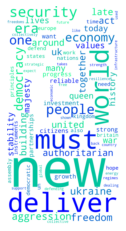

In [201]:
plt.imshow(wc_UK.generate_from_frequencies(freq_UK), interpolation = 'bilinear')
plt.axis('off') #cause the default is on
plt.show()

In [217]:
wc_UK.to_file('WordCloud_UK.png')

In [227]:
wc_US = WordCloud(width = 1000, height = 1000, min_font_size=1, max_font_size=200, 
               background_color='white', colormap= 'spring', mask = US_pic)

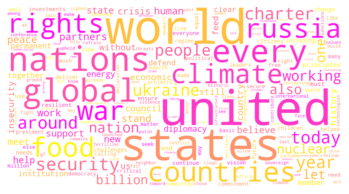

In [228]:
plt.imshow(wc_US.generate_from_frequencies(freq_US), interpolation = 'bilinear')
plt.axis('off') #cause the default is on
plt.show()

In [229]:
wc_US.to_file('WordCloud_US.png')

In [221]:
wc_SK = WordCloud(width = 1000, height = 1000, min_font_size=10, max_font_size=500, 
               background_color='white', colormap= 'autumn', mask = SK_pic)

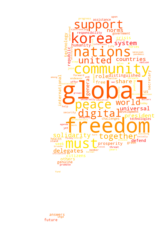

In [222]:
plt.imshow(wc_SK.generate_from_frequencies(freq_SK), interpolation = 'bilinear')
plt.axis('off') #cause the default is on
plt.show()

In [223]:
wc_SK.to_file('WordCloud_SK.png')

In [224]:
wc_ID = WordCloud(width = 1000, height = 1000, min_font_size=1, max_font_size=300, 
               background_color='white', colormap= 'summer', mask = ID_pic)

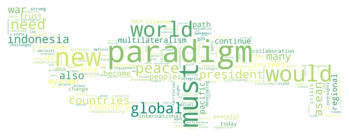

In [225]:
plt.imshow(wc_ID.generate_from_frequencies(freq_ID), interpolation = 'bilinear')
plt.axis('off') #cause the default is on
plt.show()

In [226]:
wc_ID.to_file('WordCloud_ID.png')

# Number 3

# Measure Polarity & Subjectivity scores for each country using TextBlob

In [208]:
from textblob import Word, TextBlob

In [209]:
UK_textblob= TextBlob(UK)
US_textblob= TextBlob(US)
SK_textblob= TextBlob(SK)
ID_textblob= TextBlob(ID)

In [210]:
UK_textblob.sentences

[Sentence("mr president, your excellencies, ladies and gentlemen,
 
 at the time of its foundation, the united nations was a beacon of promise."),
 Sentence("in the aftermath of the second world war, this building symbolised the end of aggression."),
 Sentence("for many decades the un has helped to deliver stability and security in much of the world."),
 Sentence("it has provided a place for nations to work together on shared challenges."),
 Sentence("and it has promoted the principles of sovereignty and self-determination even through the cold war and its aftermath."),
 Sentence("but today those principles, that have defined our lives since the dark days of the 1940s, are fracturing."),
 Sentence("for the first time in the history of this assembly we are meeting during a large-scale war of aggression in europe."),
 Sentence("and authoritarian states are undermining stability and security around the world."),
 Sentence("geopolitics is entering a new era ?"),
 Sentence("one that require

In [211]:
UK_sub = UK_textblob.sentiment.subjectivity
US_sub = US_textblob.sentiment.subjectivity
SK_sub = SK_textblob.sentiment.subjectivity
ID_sub = ID_textblob.sentiment.subjectivity

In [212]:
UK_sub

0.4609002412518037

In [213]:
UK_pol = UK_textblob.sentiment.polarity
US_pol = US_textblob.sentiment.polarity
SK_pol = SK_textblob.sentiment.polarity
ID_pol = ID_textblob.sentiment.polarity

In [214]:
# list of lists
list_of_lists = [
    ['United Kingdom', UK_sub, UK_pol],
    ['United States', US_sub, US_pol],
    ['South Korea', SK_sub, SK_pol],
    ['Indonesia', ID_sub, ID_pol]
]

# columns
columns = ['Country', 'Subjectivity', 'Polarity']

pd.DataFrame(list_of_lists, columns=columns)

,Country,Subjectivity,Polarity
0,United Kingdom,0.460900,0.118472
1,United States,0.452757,0.133014
2,South Korea,0.296547,0.122525
3,Indonesia,0.389460,0.098319
